### Decision Tree Algorithm model
- datasets의 feature를 기준으로 data를 split하는 algorithm
- advantage: none scaling, none stanrard
- disadvantage: over-fitting <--- many hyperparameter
- emsemble model로 사용하면 기존의 안좋은 성능이 좋아짐

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
feature_df, label_sr = load_iris(as_frame=True, return_X_y=True)

print(f"feature: {feature_df.shape}, {feature_df.ndim}D")
print(f"label: {label_sr.shape}, {label_sr.ndim}D")

feature: (150, 4), 2D
label: (150,), 1D


In [3]:
# train : test = 75 : 25
# stratify : label_sr
# random_state = 11

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, random_state=11, stratify=label_sr)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train test ratio: {len(X_train)/len(feature_df)*100:.2f} %, {len(X_test)/len(feature_df)*100:.2f} %")

X train: (112, 4), 2D
y train: (112,), 1D

X test: (38, 4), 2D
y test: (38,), 1D

train test ratio: 74.67 %, 25.33 %


- default learning

In [4]:
# model instance
# random_state = 11
non_dtc = DecisionTreeClassifier(random_state=11)
non_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [5]:
# model parpmeter
print(f"classes_: {non_dtc.classes_}")
print(f"n_classes_: {non_dtc.n_classes_} 개\n")

print(f"feature_names_in_: {non_dtc.feature_names_in_}")
print(f"feature_importances_: {non_dtc.feature_importances_}")

print(f"max_features_: {non_dtc.max_features_} 개\n")

print(f"n_features_in: {non_dtc.n_features_in_} 개\n")

print(f"n_outputs_: {non_dtc.n_outputs_} 개")
print(f"tree_: {non_dtc.tree_}")

classes_: [0 1 2]
n_classes_: 3 개

feature_names_in_: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
feature_importances_: [0.01785857 0.         0.42143966 0.56070177]
max_features_: 4 개

n_features_in: 4 개

n_outputs_: 1 개
tree_: <sklearn.tree._tree.Tree object at 0x000001FD1D128880>


In [6]:
# 성능 평가
train_score = non_dtc.score(X_train, y_train)
test_score = non_dtc.score(X_test, y_test)

print(f"train score: {train_score*100:.2f} %")
print(f"test score: {test_score*100:.2f} 5")

train score: 100.00 %
test score: 97.37 5


- cross validation

In [7]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [8]:
non_dtc2 =DecisionTreeClassifier(random_state=11)
non_dtc2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [9]:
# cross validaton need model instance, train datasets, cv[default=5]
# model instance: non_dtc2
# cv = 10
# return_estimator: True
# return_train_score: True

result = cross_validate(non_dtc2, X_train, y_train, cv=10, return_estimator=True, return_train_score=True)
result_df = pd.DataFrame(result)

In [10]:
result_df

,fit_time,score_time,estimator,test_score,train_score
0,0.002992,0.001994,DecisionTreeClassifier(random_state=11),1.000000,1.0
1,0.002343,0.001646,DecisionTreeClassifier(random_state=11),0.833333,1.0
2,0.001995,0.000997,DecisionTreeClassifier(random_state=11),0.909091,1.0
3,0.001995,0.000997,DecisionTreeClassifier(random_state=11),1.000000,1.0
4,0.001995,0.001995,DecisionTreeClassifier(random_state=11),1.000000,1.0
5,0.001995,0.000997,DecisionTreeClassifier(random_state=11),0.818182,1.0
6,0.001995,0.000997,DecisionTreeClassifier(random_state=11),1.000000,1.0
7,0.000997,0.001995,DecisionTreeClassifier(random_state=11),1.000000,1.0
8,0.001996,0.001994,DecisionTreeClassifier(random_state=11),1.000000,1.0
9,0.001995,0.001997,DecisionTreeClassifier(random_state=11),0.909091,1.0


In [11]:
print(result_df['train_score'].mean(), result_df['test_score'].mean())

1.0 0.9469696969696969


- hyperparameter tuning
    - max_depth, min_samples_split, min_sample_leaf, max_feature, max_leaf_modes

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
params = {'max_depth':[4, 3, 2, 1], 'min_samples_leaf':[5, 3, 2]}

In [14]:
dtc_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5, refit=True, return_train_score=True)
dtc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [15]:
# parameter
print(f"best_params_: {dtc_grid.best_params_}")
print(f"bets_score_: {dtc_grid.best_score_}")
print(f"best_estimator_: {dtc_grid.best_estimator_}")

cv_result = dtc_grid.cv_results_
cv_result_df = pd.DataFrame(cv_result)

best_params_: {'max_depth': 4, 'min_samples_leaf': 5}
bets_score_: 0.9387351778656126
best_estimator_: DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)


In [16]:
cv_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003513,0.001290,0.003102,0.001257,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.826087,1.000000,...,0.938735,0.064971,1,0.966292,0.977528,0.944444,0.955556,0.966667,0.962097,0.011234
1,0.001765,0.000747,0.001856,0.000770,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.956522,0.782609,1.000000,...,0.929644,0.075541,3,0.977528,0.977528,0.966667,0.977778,0.977778,0.975456,0.004396
2,0.001592,0.000485,0.001788,0.000396,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.869565,0.782609,1.000000,...,0.912253,0.077339,9,0.988764,0.977528,0.966667,0.977778,0.977778,0.977703,0.006988
3,0.001407,0.000480,0.001785,0.000394,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.826087,1.000000,...,0.938735,0.064971,1,0.966292,0.977528,0.944444,0.955556,0.966667,0.962097,0.011234
4,0.001595,0.000488,0.001645,0.000537,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.782609,1.000000,...,0.920949,0.074441,7,0.966292,0.977528,0.944444,0.955556,0.977778,0.964320,0.012894
5,0.001596,0.000489,0.001396,0.000488,3,2,"{'max_depth': 3, 'min_samples_leaf': 2}",0.913043,0.782609,1.000000,...,0.920949,0.074441,7,0.966292,0.977528,0.944444,0.955556,0.977778,0.964320,0.012894
6,0.001989,0.000631,0.001795,0.000746,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.913043,0.826087,1.000000,...,0.929644,0.058634,3,0.966292,0.977528,0.944444,0.955556,0.955556,0.959875,0.011209
7,0.002240,0.000857,0.001517,0.000334,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.913043,0.826087,1.000000,...,0.929644,0.058634,3,0.966292,0.977528,0.944444,0.955556,0.955556,0.959875,0.011209
8,0.001589,0.000483,0.001197,0.000399,2,2,"{'max_depth': 2, 'min_samples_leaf': 2}",0.913043,0.826087,1.000000,...,0.929644,0.058634,3,0.966292,0.977528,0.944444,0.955556,0.955556,0.959875,0.011209
9,0.001795,0.000399,0.001197,0.000399,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.652174,0.652174,0.681818,...,0.651779,0.016601,10,0.674157,0.674157,0.666667,0.677778,0.677778,0.674107,0.004057


In [17]:
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [18]:
cv_result_df[['mean_train_score', 'mean_test_score', 'rank_test_score']]

,mean_train_score,mean_test_score,rank_test_score
0,0.962097,0.938735,1
1,0.975456,0.929644,3
2,0.977703,0.912253,9
3,0.962097,0.938735,1
4,0.964320,0.920949,7
5,0.964320,0.920949,7
6,0.959875,0.929644,3
7,0.959875,0.929644,3
8,0.959875,0.929644,3
9,0.674107,0.651779,10


In [19]:
best_model = dtc_grid.best_estimator_
print(f"max_depth: {best_model.max_depth}")
print(f"min_samples_leaf: {best_model.min_samples_leaf}")

max_depth: 4
min_samples_leaf: 5


In [20]:
best_model.feature_importances_, best_model.n_features_in_

(array([0.        , 0.        , 0.41313868, 0.58686132]), 4)

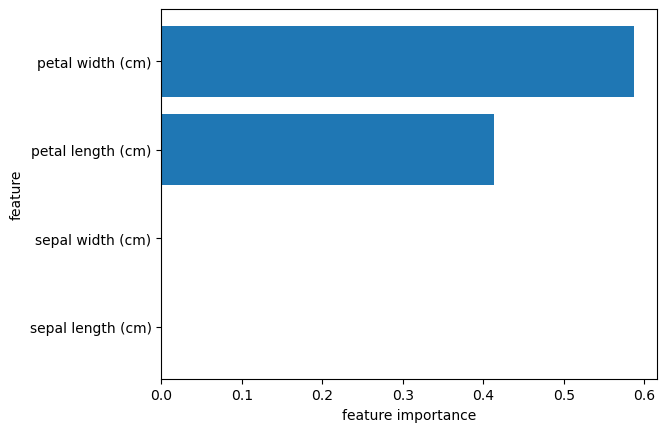

In [21]:
plt.barh(range(best_model.n_features_in_), best_model.feature_importances_, align='center')
plt.yticks(np.arange(best_model.n_features_in_), best_model.feature_names_in_)
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.show()

In [22]:
from sklearn.tree import export_graphviz
import graphviz

- Decision Tree Visualization
    - Graphviz program + python 패키지 graphviz install

In [23]:
export_graphviz(best_model, out_file='../data/tree.dot', class_names=['setosa', 'versicolor', 'verginica'],
                feature_names=best_model.feature_names_in_, impurity=True)

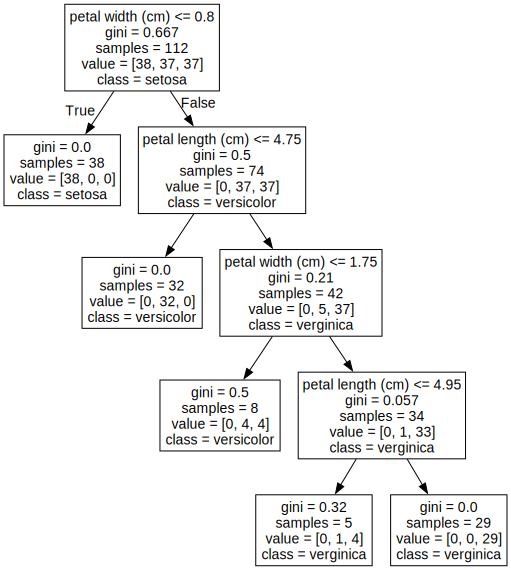

In [24]:
# .dot file open
with open('../data/tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

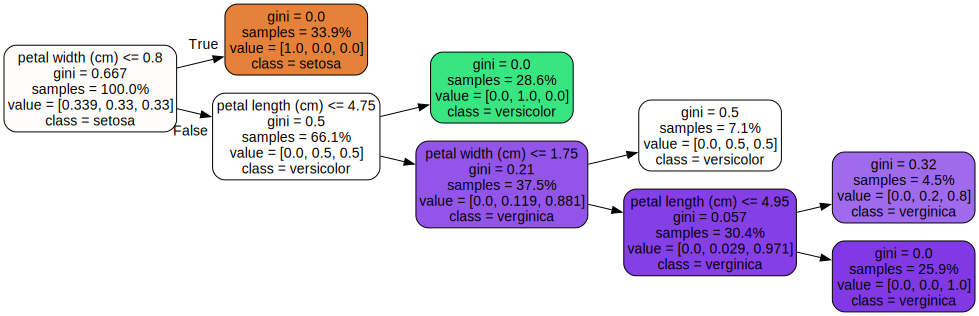

In [ ]:
export_graphviz(best_model, out_file='../data/tree_filled.dot', class_names=['setosa', 'versicolor', 'verginica'],
                feature_names=best_model.feature_names_in_, impurity=True, filled=True, rounded=True,
                proportion=True, rotate=True)
# .dot file open
with open('../data/tree_filled.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)


- prediction new data

In [27]:
new_data = feature_df.iloc[[0]]+0.21
new_data.shape

(1, 4)

In [28]:
best_model.predict(new_data)

array([0])

In [29]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])